## Contours

In [1]:
# Import necessary libraries
from PIL import Image
from skimage import measure
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import sobel
import matplotlib.pyplot as plt

In [2]:
# For original image
img = Image.open("images/image.jpg")
img.show()

In [3]:
#Read an image
img = imread('images/image.jpg')

#Convert the image to grayscale
img_gray = rgb2gray(img)

In [4]:
#Find edges in the image
img_edges = sobel(img_gray)

#Find contours in the image
contours = measure.find_contours(img_edges, 0.2)

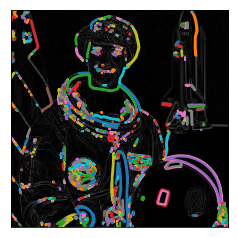

In [5]:
# Display the image and plot all contours found
fig, ax = plt.subplots()
ax.imshow(img_edges, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

ax.axis('image')
ax.set_xticks([])
ax.set_yticks([])
plt.savefig("Saved_images/Contour.jpg")
plt.show()

# Watershed

In [6]:
# Import necessary libraries
from scipy import ndimage as ndi
import matplotlib.pyplot as plt

from skimage.morphology import watershed, disk
from skimage import data
from skimage.io import imread
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

In [7]:
# Load image and convert it into gray
img = data.astronaut()
img_gray = rgb2gray(img)

# convert images as byte
image = img_as_ubyte(img_gray)
image

/home/ratan/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


array([[149, 106,  62, ..., 121, 117, 120],
       [172, 142, 115, ..., 119, 116, 116],
       [195, 179, 166, ..., 121, 118, 116],
       ...,
       [174, 174, 171, ...,   0,   0,   0],
       [172, 170, 169, ...,   0,   1,   0],
       [171, 169, 166, ...,   0,   1,   0]], dtype=uint8)

In [8]:
#Calculate the local gradients of the image
#and only select the points that have a
#gradient value of less than 20
markers = rank.gradient(image, disk(5)) < 20
markers = ndi.label(markers)[0]

gradient = rank.gradient(image, disk(2))

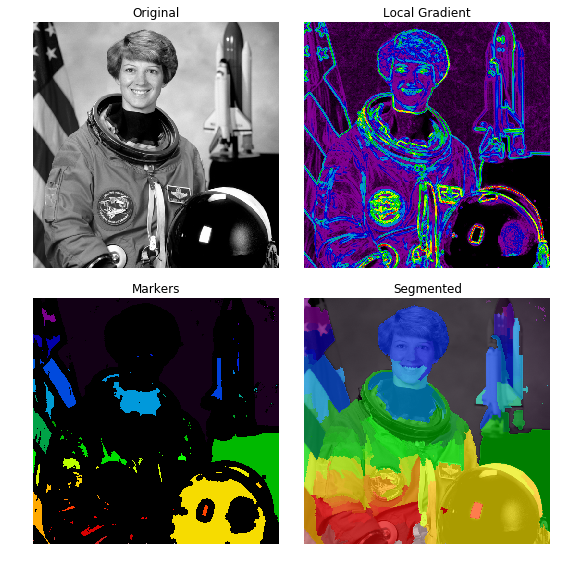

In [9]:
#Watershed Algorithm
labels = watershed(gradient, markers)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8), sharex=True, sharey=True, subplot_kw={'adjustable':'box-forced'})
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title("Original")

ax[1].imshow(gradient, cmap=plt.cm.spectral, interpolation='nearest')
ax[1].set_title("Local Gradient")

ax[2].imshow(markers, cmap=plt.cm.spectral, interpolation='nearest')
ax[2].set_title("Markers")

ax[3].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[3].imshow(labels, cmap=plt.cm.spectral, interpolation='nearest', alpha=.7)
ax[3].set_title("Segmented")

for a in ax:
    a.axis('off')

fig.tight_layout()
plt.savefig("Saved_images/Watershed.jpg")
plt.show()